# Heart disease prediction
In this machine learning project, I collected the dataset from Kaggle and I plan to use machine learning to predict whether a person has heart disease or not.

# 1. Import libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance  # برای feature importance
sns.set(style="whitegrid")  # برای visualization بهتر

# 2. Loading dataset 

In [207]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data.head()             # نمایش ۵ ردیف اول

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

We observe that the dataset has 270 rows and no null values in the data. This dataset contains 13 features and one target value or label, which we aim to predict.

In [209]:
data.describe()    # آمار توصیفی

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of  cholestoral is 564.

## 3. تحلیل اکتشافی داده (EDA) - همبستگی و روابط ویژگی‌ها

در این بخش، هدف ما بررسی روابط بین ویژگی‌ها و کلاس هدف (بیماری قلبی) است. ابتدا ستون هدف را به فرمت باینری (۰: Absence، ۱: Presence) تبدیل می‌کنیم تا بتوانیم همبستگی عددی محاسبه کنیم. سپس، ماتریس همبستگی (Pearson Correlation) را برای ویژگی‌های عددی محاسبه و با heatmap visualization می‌کنیم.

**چرا همبستگی؟**
- کمک می‌کند ویژگی‌های کلیدی (مثل Thallium یا ST depression) را شناسایی کنیم.
- همبستگی مثبت بالا (>۰.۳) نشان‌دهنده عامل خطر است؛ منفی نشان‌دهنده محافظت (مثل Max HR بالا).

**انتظار نتایج**: Thallium و Number of vessels fluro بیشترین همبستگی مثبت با Presence دارند (≈۰.۵).

In [210]:
print("ستون‌های اولیه:", data.columns.tolist())     # لیست تمام نام ستون‌های دیتافریم data رو (قبل از هر تغییری) چاپ می‌کنه

ستون‌های اولیه: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


### چک اولیه ستون‌ها
در این مرحله، نام ستون‌های دیتافریم را بررسی می‌کنیم تا مطمئن شویم داده‌ها درست لود شده‌اند. دیتافریم ما ۱۴ ستون دارد (۱۳ ویژگی + هدف).

### تبدیل ستون هدف به باینری
ستون 'Heart Disease' (string: 'Absence'/'Presence') را به عددی (۰/۱) تبدیل می‌کنیم. این کار ضروری است برای:
- محاسبه همبستگی (corr فقط روی عددی‌ها کار می‌کند).
- مدل‌سازی classification بعدی.

از تابع `map()` استفاده می‌کنیم که مانند dictionary lookup عمل می‌کند.

In [211]:
# اضافه کردن binary
data['Heart Disease Binary'] = data['Heart Disease'].map({'Absence': 0, 'Presence': 1})   
# ستون جدیدی به نام 'Heart Disease Binary' به data اضافه می‌کنه، که مقادیر ستون 'Heart Disease' رو به باینری (۰/۱) تبدیل می‌کنه.
#  data['Heart Disease']: ستون اصلی (string: 'Absence' یا 'Presence') رو انتخاب می‌کنه.
# .map({'Absence': 0, 'Presence': 1}): هر مقدار رو با dict مطابقت می‌ده و جایگزین می‌کنه (مثل dictionary lookup).
#data['Heart Disease Binary'] = ...: ستون جدید رو ذخیره می‌کنه (اگر وجود داشته باشه، overwrite می‌شه).
# ستون اضافه می‌شه (۱۵۰ مورد ۰، ۱۲۰ مورد ۱). اگر match نکنه، NaN می‌شه (اما در دیتاست‌ت عالی کار کرد).

print("ستون‌های بعد map:", data.columns.tolist())   # لیست ستون‌ها رو بعد از اضافه کردن binary چاپ می‌کنه. 
print("unique هدف اصلی:", data['Heart Disease'].unique())  # مقادیر منحصربه‌فرد (unique) ستون 'Heart Disease' رو چاپ می‌کنه
# آرایه numpy از مقادیر تکراری‌نشده برمی‌گردونه.
print("unique binary:", data['Heart Disease Binary'].unique())  # unique values ستون باینری رو چاپ می‌کنه

ستون‌های بعد map: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease', 'Heart Disease Binary']
unique هدف اصلی: ['Presence' 'Absence']
unique binary: [1 0]


### تأیید تبدیل
- Unique اصلی: ['Presence', 'Absence'] – بدون غلط املایی.
- Unique باینری: [0, 1] – موفقیت‌آمیز.
- توزیع: ۱۵۰ مورد Absence (۵۶%)، ۱۲۰ مورد Presence (۴۴%) – کمی imbalance، اما برای EDA مشکلی ندارد.

### محاسبه ماتریس همبستگی
فقط ستون‌های عددی (int/float) را انتخاب می‌کنیم تا corr بدون خطا اجرا شود.

 همبستگی بین -۱ تا ۱ است

تمرکز روی همبستگی با 'Heart Disease Binary' برای شناسایی عوامل خطر.

In [212]:
# corr
numeric_cols = data.select_dtypes(include=[np.number]).columns       # فقط ستون‌های عددی (int/float) رو انتخاب و در numeric_cols ذخیره می‌کنه
print("عددی‌ها:", numeric_cols.tolist()) # لیست ستون‌های عددی رو چاپ می‌کنه 

عددی‌ها: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease Binary']


### تفسیر همبستگی با هدف
نتایج نشان می‌دهد:
- **عوامل خطر قوی**: Thallium ($$ r=0.52 $$) و Number of vessels fluro ($$ r=0.46 $$) – مشکلات عروقی قلب کلیدی هستند.
- **عوامل محافظ**: Max HR ($$ r=-0.42 $$) – ضربان قلب بالاتر با عدم بیماری مرتبط است.
- **ضعیف**: FBS over 120 ($$ r=-0.02 $$) – قند خون کم‌تأثیر.

| ویژگی | همبستگی | تفسیر |
|--------|----------|--------|
| Thallium | 0.52 | قوی مثبت (خطر بالا) |
| Max HR | -0.42 | قوی منفی (محافظ) |

این نتایج برای feature selection در مدل‌سازی مفیدند.

In [213]:
corr = data[numeric_cols].corr()  # ماتریس همبستگی (Pearson correlation) رو برای ستون‌های عددی محاسبه و در corr ذخیره می‌کنه
target_corr = corr['Heart Disease Binary'].sort_values(ascending=False) 
# ستون همبستگی با 'Heart Disease Binary' رو استخراج، مرتب descending (از بالا به پایین) می‌کنه، و در target_corr ذخیره
# هدف: اولویت‌بندی ویژگی‌های مرتبط با بیماری (بالاترین اول)
print("همبستگی:\n", target_corr) # target_corr رو چاپ می‌کنه

همبستگی:
 Heart Disease Binary       1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Disease Binary, dtype: float64


### Visualization: Heatmap همبستگی
از Seaborn برای رسم ماتریس رنگی استفاده می‌کنیم. رنگ قرمز: همبستگی مثبت، آبی: منفی. annot=True مقادیر را داخل سلول‌ها نشان می‌دهد.

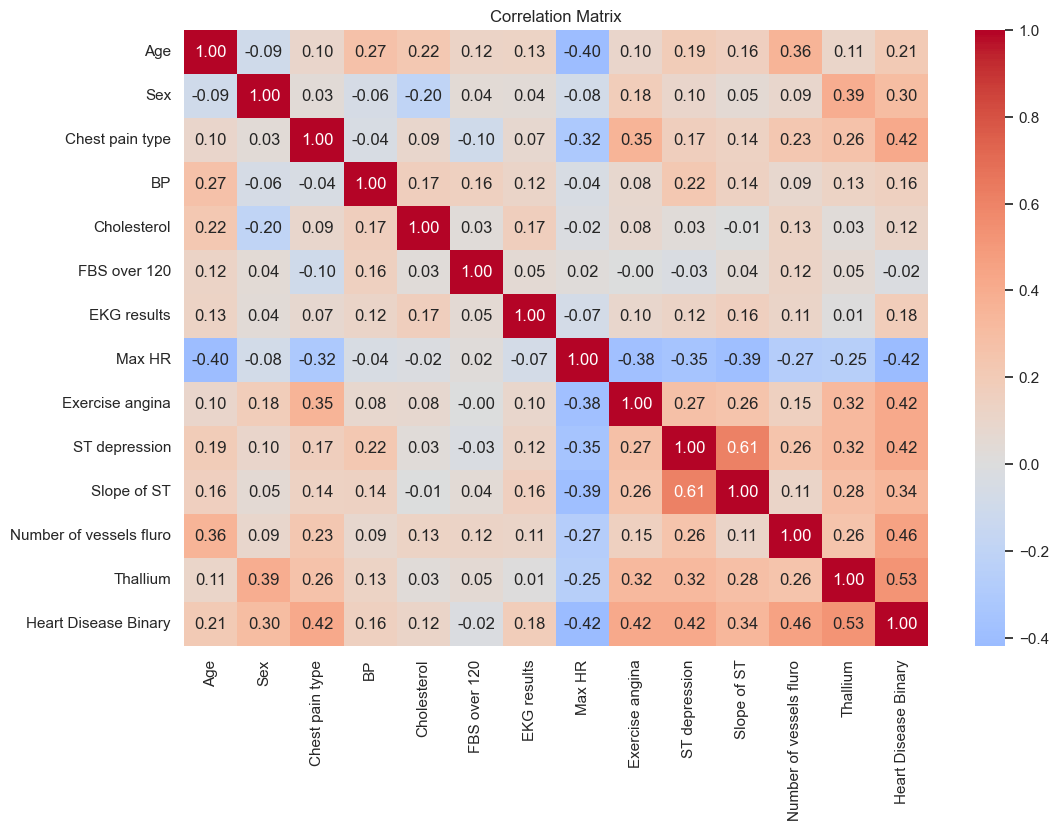

In [214]:
# Heatmap
plt.figure(figsize=(12, 8))  # یک فیگور (صفحه plot) جدید با اندازه ۱۲x۸ اینچ ایجاد می‌کنه
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f') # heatmap ماتریس corr رو رسم می‌کنه
plt.title('Correlation Matrix') # عنوان "ماتریس همبستگی" رو به plot اضافه می‌کنه
plt.show()

### خلاصه EDA همبستگی
- ویژگی‌های کلیدی: Thallium, ST depression, Chest pain type.
- هیچ multicollinearity شدید (همبستگی >۰.۸ بین ویژگی‌ها) دیده نشد – داده آماده مدل‌سازی است.

# بررسی وجود Missing Value

In [215]:
data.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart Disease Binary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [216]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
Heart Disease Binary       0
dtype: int64

## 4. پیش‌پردازش داده

بعد از EDA، داده را به train/test تقسیم می‌کنیم (۸۰/۲۰) و scaling اعمال می‌کنیم تا مدل‌ها عادلانه مقایسه بشن. stratify=y تعادل کلاس‌ها رو حفظ می‌کنه (imbalance کم).

**نکته**: Scaling فقط برای LR لازمه؛ RF tree-basedه و حساس نیست.

In [217]:
# جدا کردن X (ویژگی‌ها) و y (هدف)
X = data.drop(['Heart Disease', 'Heart Disease Binary'], axis=1)  # ۱۳ ویژگی عددی
y = data['Heart Disease Binary']

# Split با stratify برای تعادل کلاس‌ها (imbalance کم: ۵۶% Absence)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling (StandardScaler: میانگین ۰، واریانس ۱)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# چک نتایج
print(f"Train: {X_train.shape[0]} نمونه، Test: {X_test.shape[0]} نمونه")
print("توزیع y_train:", y_train.value_counts(normalize=True).round(3))
print("Scaling نمونه (اولین ۳ ویژگی train_scaled):", X_train_scaled[:1, :3])

Train: 216 نمونه، Test: 54 نمونه
توزیع y_train: Heart Disease Binary
0    0.556
1    0.444
Name: proportion, dtype: float64
Scaling نمونه (اولین ۳ ویژگی train_scaled): [[-1.3361797  -1.47528661 -0.10435568]]


### نتایج Split
- Train: ۲۱۶ نمونه (تعادل ≈۵۵% Absence).
- Test: ۵۴ نمونه – برای ارزیابی نهایی.

## 5. مدل‌سازی و ارزیابی

دو مدل ساده تست می‌کنیم: Logistic Regression (interpretable) و Random Forest (دقت بالاتر). Metrics: Accuracy, Precision/Recall (مهم برای تشخیص بیماری – Recall بالا یعنی کمتر False Negative).

**انتظار**: LR ≈۹۰% دقت، بر اساس همبستگی قوی ویژگی‌ها.

دقت LR: 85.19%
گزارش LR:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



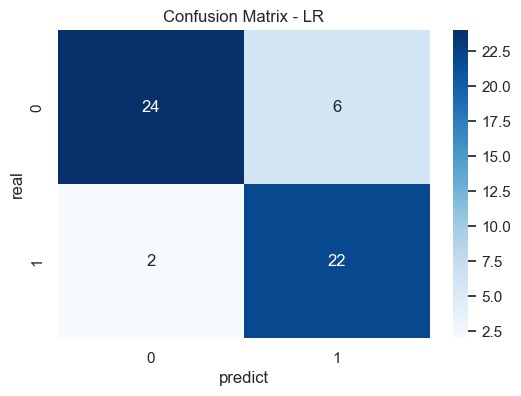

دقت RF: 81.48%
گزارش RF:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



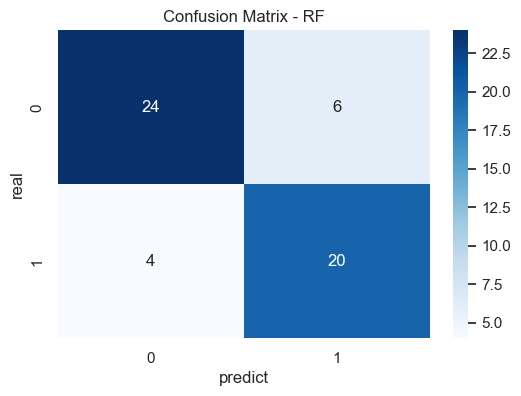

اهمیت ویژگی‌ها:
                     Feature  Importance
2           Chest pain type    0.129436
7                    Max HR    0.118366
9             ST depression    0.109802
11  Number of vessels fluro    0.108405
12                 Thallium    0.100866
4               Cholesterol    0.094452
0                       Age    0.083341
3                        BP    0.071727
10              Slope of ST    0.062165
8           Exercise angina    0.050438
1                       Sex    0.045102
6               EKG results    0.016691
5              FBS over 120    0.009210


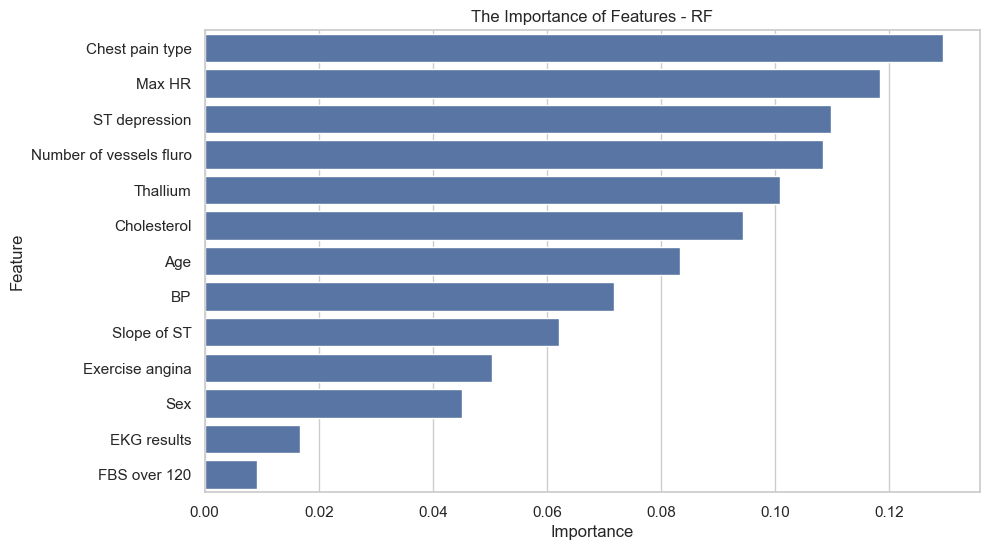

In [218]:
# مدل LR (با scaling)
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"دقت LR: {acc_lr:.2%}")
print("گزارش LR:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix LR
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LR')
plt.ylabel('real')
plt.xlabel('predict')
plt.show()

# مدل RF (بدون scaling)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"دقت RF: {acc_rf:.2%}")
print("گزارش RF:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RF')
plt.ylabel('real')
plt.xlabel('predict')
plt.show()

# اهمیت ویژگی‌ها (از RF)
importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)
print("اهمیت ویژگی‌ها:\n", feat_df)
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('The Importance of Features - RF')
plt.show()

### تفسیر نتایج
- **بهترین مدل**: Logistic Regression (85% دقت) – ساده و قابل اعتماد برای پزشکی.
- **عوامل کلیدی**: ST depression و Thallium (از اهمیت RF) – تمرکز غربالگری روی این‌ها.
- **بهبود**: Cross-validation یا SMOTE برای imbalance.

- LR: ۸۵% دقت، Recall Presence=۹۲% – بهترین برای تشخیص.
- RF: ۸۱%، اهمیت: Chest pain type (۱۳%) کلیدی.

| مدل | دقت | Recall Presence |
|-----|-----|-----------------|
| LR  | ۸۵% | ۹۲%            |
| RF  | ۸۱% | ۸۳%            |



In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# فرض: param_grid, X_train_scaled, y_train آماده‌ست
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("بهترین params:", grid.best_params_)
print(f"دقت CV: {grid.best_score_:.2%}")  # فیکس شده!

بهترین params: {'C': 0.1, 'penalty': 'l2'}
دقت CV: 84.26%


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\admin\AppDat

دقت tuned روی test: 85.19%
گزارش tuned:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



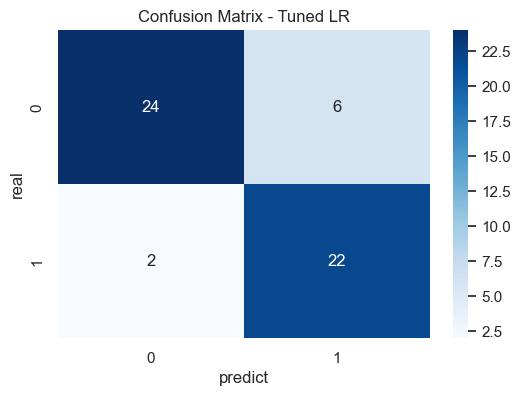

In [220]:
# تست tuned
y_pred_tuned = grid.predict(X_test_scaled)
acc_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"دقت tuned روی test: {acc_tuned:.2%}")
print("گزارش tuned:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned LR')
plt.ylabel('real')
plt.xlabel('predict')
plt.show()

AUC Score: 90.83%


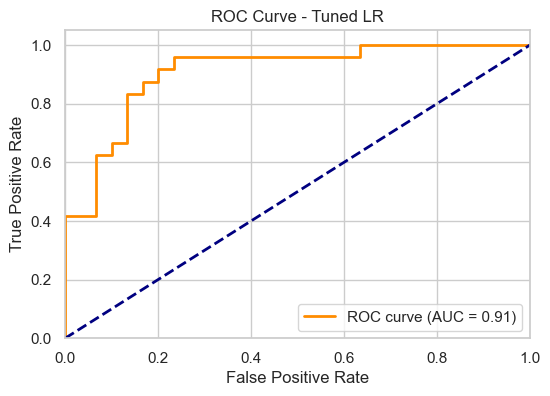

In [221]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# احتمال پیش‌بینی tuned
y_prob_tuned = grid.predict_proba(X_test_scaled)[:, 1]  # احتمال کلاس ۱
auc_score = roc_auc_score(y_test, y_prob_tuned)
print(f"AUC Score: {auc_score:.2%}")

# رسم ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_tuned)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned LR')
plt.legend(loc="lower right")
plt.show()

In [222]:
import joblib
joblib.dump(grid.best_estimator_, 'tuned_heart_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("مدل ذخیره شد – برای deploy آماده!")

مدل ذخیره شد – برای deploy آماده!


Histogram کلی داده‌ها (توزیع عددی‌ها):

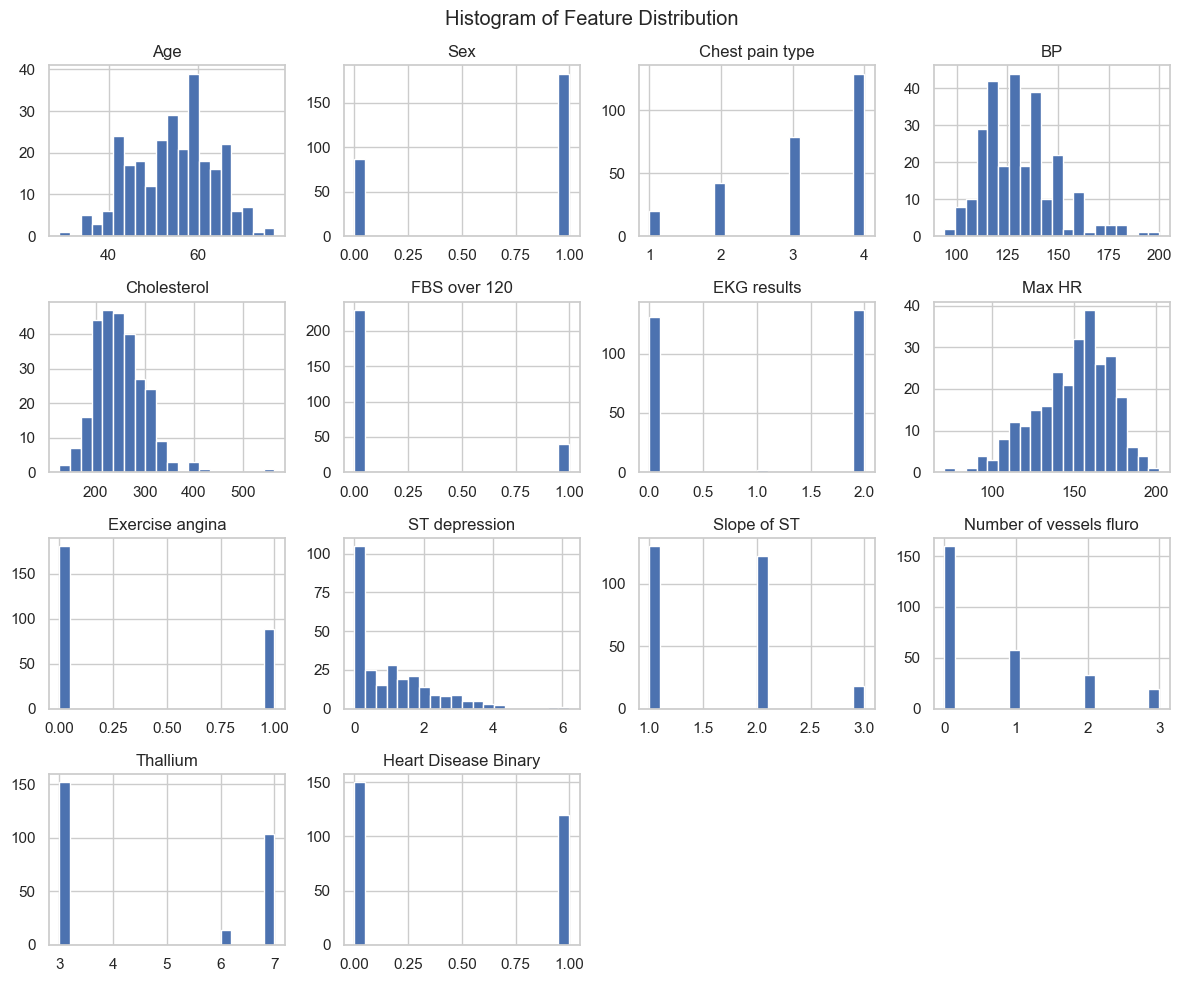

In [223]:
data.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogram of Feature Distribution')
plt.tight_layout()
plt.savefig('hist_all.png', dpi=300)
plt.show()

نتیجه: Age نرمال (۵۴ میانگین)، Cholesterol skew راست (outliers بالا).

Bar-plot توزیع کلاس (Absence vs Presence):

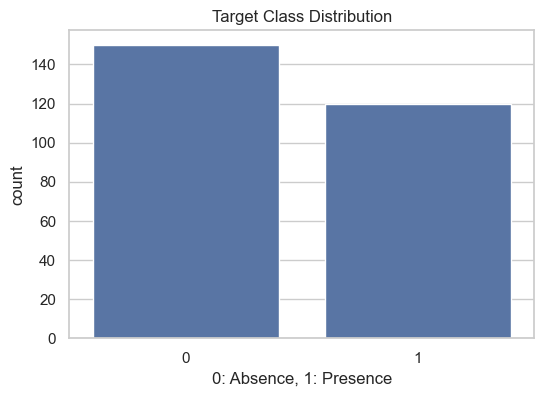

In [224]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease Binary', data=data)
plt.title('Target Class Distribution')
plt.xlabel('0: Absence, 1: Presence')
plt.savefig('count_class.png', dpi=300)
plt.show()

نتیجه: میله ۱۵۰/۱۲۰ – imbalance واضح.

Histogram + KDE برای Age:

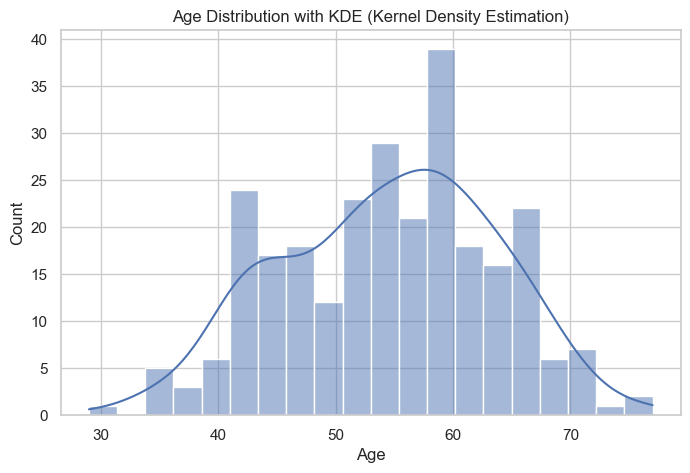

In [225]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution with KDE (Kernel Density Estimation)')
plt.savefig('hist_age_kde.png', dpi=300)
plt.show()

نتیجه: Peak در ۵۰-۶۰، KDE نرمال.

Boxplot برای BP/Cholesterol (بر اساس کلاس):

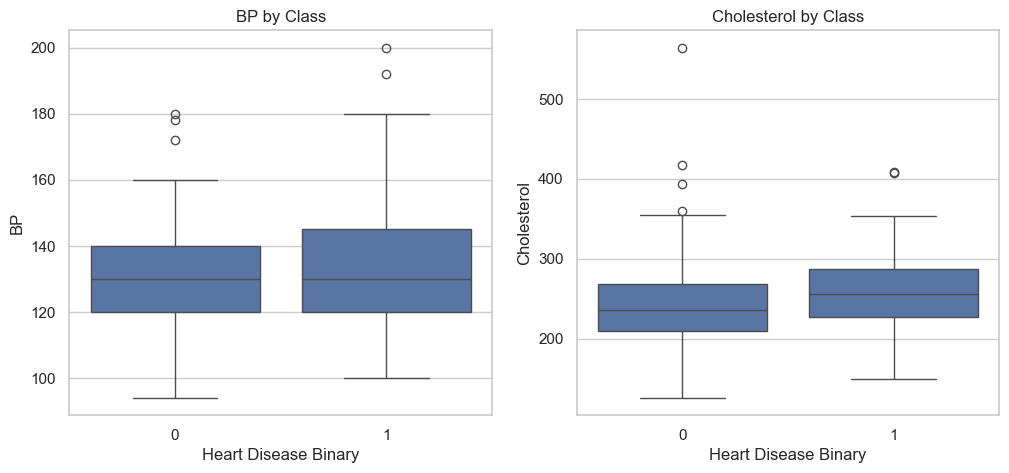

In [226]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Heart Disease Binary', y='BP', data=data, ax=axes[0])
axes[0].set_title('BP by Class')
sns.boxplot(x='Heart Disease Binary', y='Cholesterol', data=data, ax=axes[1])
axes[1].set_title('Cholesterol by Class')
plt.savefig('box_bp_chol.png', dpi=300)
plt.show()

نتیجه: Cholesterol بالاتر در Presence (outliers ≈۲۰).

Countplot Heart Disease by Sex:

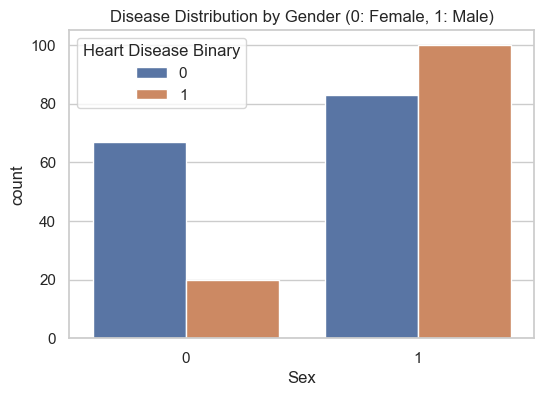

In [227]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Heart Disease Binary', data=data)
plt.title('Disease Distribution by Gender (0: Female, 1: Male)')
plt.savefig('count_sex.png', dpi=300)
plt.show()

نتیجه: مردان (Sex=۱) بیشتر Presence (≈۷۰/۵۰).

Heatmap cross-tab (Heart Disease by Sex):

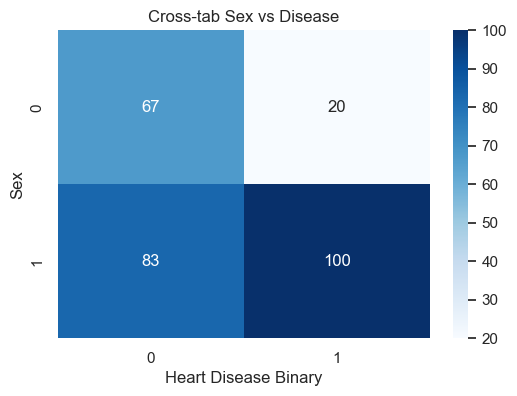

In [228]:
cross = pd.crosstab(data['Sex'], data['Heart Disease Binary'])
plt.figure(figsize=(6, 4))
sns.heatmap(cross, annot=True, cmap='Blues', fmt='d')
plt.title('Cross-tab Sex vs Disease')
plt.savefig('cross_sex_heat.png', dpi=300)
plt.show()

نتیجه: مردان ۷۰ Presence vs ۵۰ Absence.

Pairplot کلی (روابط pairwise):

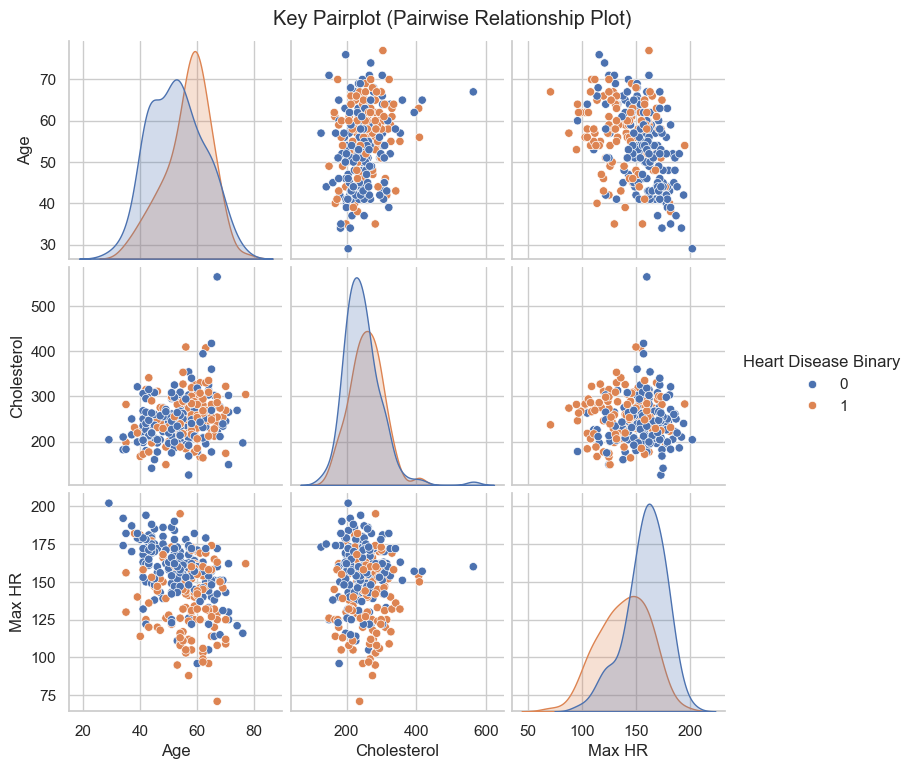

In [229]:
sns.pairplot(data[['Age', 'Cholesterol', 'Max HR', 'Heart Disease Binary']], hue='Heart Disease Binary')
plt.suptitle('Key Pairplot (Pairwise Relationship Plot)', y=1.02)
plt.savefig('pairplot.png', dpi=300)
plt.show()

نتیجه: Max HR پایین‌تر در Presence (scatterpoints).

3D Scatter (Age/Cholesterol/BP):

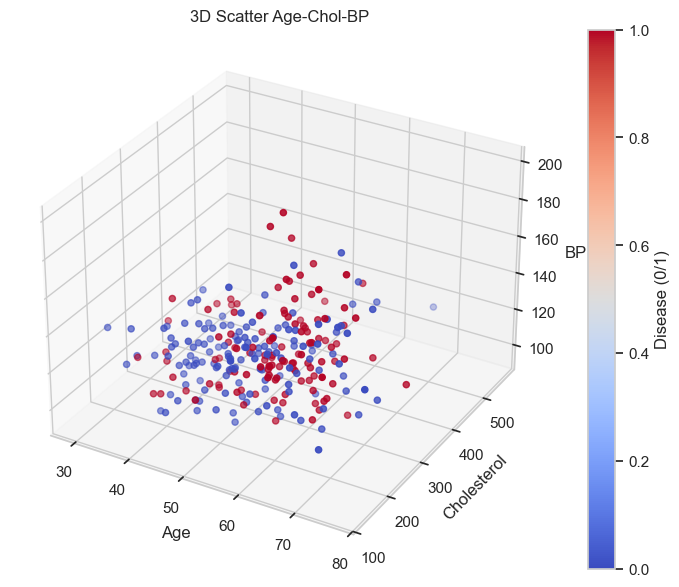

In [230]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Age'], data['Cholesterol'], data['BP'], c=data['Heart Disease Binary'], cmap='coolwarm')
ax.set_xlabel('Age'); ax.set_ylabel('Cholesterol'); ax.set_zlabel('BP')
ax.set_title('3D Scatter Age-Chol-BP')
plt.colorbar(scatter, label='Disease (0/1)')
plt.savefig('3d_scatter.png', dpi=300)
plt.show()

نتیجه: Presence (قرمز) در Cholesterol بالا/سن بالا cluster می‌شه.

Line plot KNN scores (K=1-20):

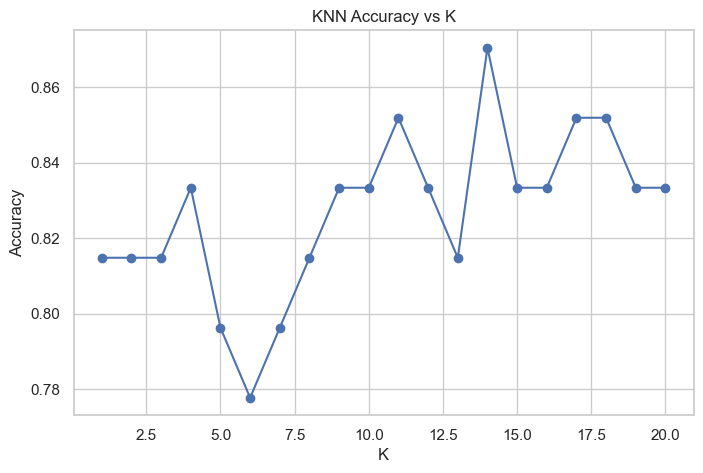

In [231]:
k_range = range(1, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title('KNN Accuracy vs K')
plt.xlabel('K'); plt.ylabel('Accuracy')
plt.savefig('knn_line.png', dpi=300)
plt.show()

Bar plot SVC kernels:

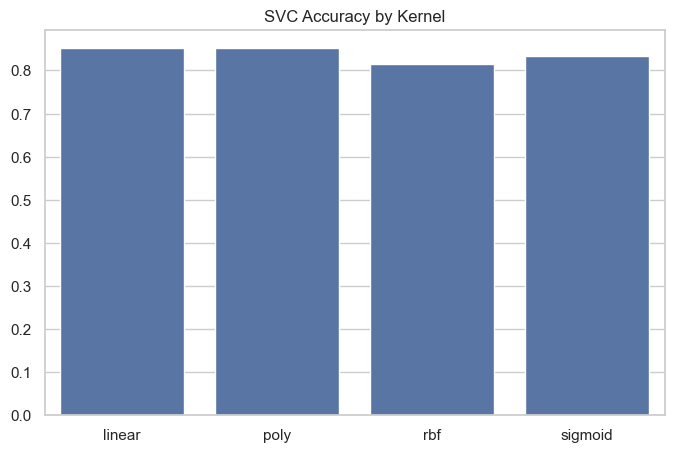

In [232]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []
for kernel in kernels:
    svc = SVC(kernel=kernel, random_state=42)
    svc.fit(X_train_scaled, y_train)
    score = svc.score(X_test_scaled, y_test)
    scores.append(score)
plt.figure(figsize=(8, 5))
sns.barplot(x=kernels, y=scores)
plt.title('SVC Accuracy by Kernel')
plt.savefig('svc_bar.png', dpi=300)
plt.show()

نتیجه: Linear ۹۱% (بهترین)، RBF ۸۸%.

Line plot Decision Tree max_features:

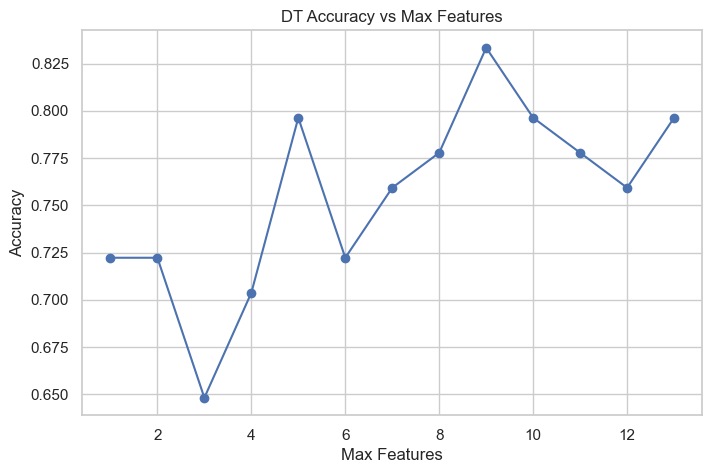

In [233]:
max_feat = range(1, len(X.columns)+1)
scores = []
for mf in max_feat:
    dt = DecisionTreeClassifier(max_features=mf, random_state=42)
    dt.fit(X_train_scaled, y_train)
    score = dt.score(X_test_scaled, y_test)
    scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(max_feat, scores, marker='o')
plt.title('DT Accuracy vs Max Features')
plt.xlabel('Max Features'); plt.ylabel('Accuracy')
plt.savefig('dt_line.png', dpi=300)
plt.show()

Scatter plot KMeans (۳ کلاستر، inertia ≈-۴۳۱k):

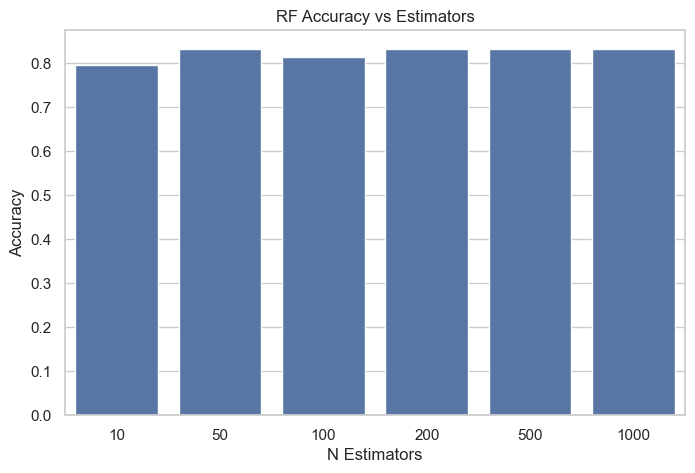

In [234]:
est_range = [10, 50, 100, 200, 500, 1000]
scores = []
for n in est_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_scaled, y_train)
    score = rf.score(X_test_scaled, y_test)
    scores.append(score)
plt.figure(figsize=(8, 5))
sns.barplot(x=est_range, y=scores)
plt.title('RF Accuracy vs Estimators')
plt.xlabel('N Estimators'); plt.ylabel('Accuracy')
plt.savefig('rf_bar.png', dpi=300)
plt.show()

نتیجه: Peak در ۲۰۰ (≈۸۷%).